In [78]:
import numpy as np
from scipy import interpolate
from scipy.linalg import lu, solve_triangular
from scipy.optimize import fsolve, minimize, golden, minimize_scalar
import matplotlib.pyplot as plt


In [13]:
#2.1
A = np.array([
    [1,5,2,3],
    [1,6,8,6],
    [1,6,11,2],
    [1,7,17,4]
    ])
b = [1,2,1,1]
P,L,U = lu(A)
Pb=np.dot(P,b)
y = np.linalg.solve(L,Pb)
x = np.linalg.solve(U,y)
print(f'P:\n{P}\nL:\n{L}\nU:\n{U}')
print(f'product of L and U is:\n {np.matmul(L,U)}')
print(f'First we find y by solving Ly = b, so we get y = {y}.\nThen, we find x by solving Ux = y, so we get x = {x}')
print(f'The solution to the Linear equation is {np.linalg.solve(A,b)}' )
print(f'The dot product of A and x is {np.dot(A,x)}')

P:
[[1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]]
L:
[[ 1.   0.   0.   0. ]
 [ 1.   1.   0.   0. ]
 [ 1.   0.5  1.   0. ]
 [ 1.   0.5 -1.   1. ]]
U:
[[ 1.   5.   2.   3. ]
 [ 0.   2.  15.   1. ]
 [ 0.   0.   1.5 -1.5]
 [ 0.   0.   0.   1. ]]
product of L and U is:
 [[ 1.  5.  2.  3.]
 [ 1.  7. 17.  4.]
 [ 1.  6. 11.  2.]
 [ 1.  6.  8.  6.]]
First we find y by solving Ly = b, so we get y = [1. 0. 0. 1.].
Then, we find x by solving Ux = y, so we get x = [36. -8.  1.  1.]
The solution to the Linear equation is [36. -8.  1.  1.]
The dot product of A and x is [1. 2. 1. 1.]


In [20]:
#2.2

#Defining equations
def equations(vars):
    c1, c2, lam = vars
    eq1 = 1 / c1**2 - lam            # ∂L/∂c1 = 0 ⇒ 1/c1² - λ = 0
    eq2 = 1 / c2**2 - lam            # ∂L/∂c2 = 0 ⇒ 1/c2² - λ = 0
    eq3 = c1 + c2 - 1                # Budget constraint: c1 + c2 = 1
    return [eq1, eq2, eq3]

# Initial guess
initial_guess = [0.4, 0.6, 1.0]

# Solve the system
solution = fsolve(equations, initial_guess)

# Print results
c1, c2, lam = solution
print(f"Numerical solution using :")
print(f"c1 = {c1:.4f}")
print(f"c2 = {c2:.4f}")
print(f"lambda = {lam:.4f}")

# Objective function (negative utility to perform maximization)
def neg_utility(c):
    c1, c2 = c
    if c1 <= 0 or c2 <= 0:
        return np.inf  
    return 1 / c1 + 1 / c2  # Negative of (-1/c1 - 1/c2)

# Constraint: c1 + c2 = 1
constraint = {
    'type': 'eq',
    'fun': lambda c: c[0] + c[1] - 1
}

# Initial guess
initial_guess = [0.4, 0.6]

# Call the optimizer
result = minimize(neg_utility, initial_guess, method='SLSQP', constraints=constraint)

# Extract results
c1_opt, c2_opt = result.x

print("Solution using minimization :")
print(f"c1 = {c1_opt:.4f}")
print(f"c2 = {c2_opt:.4f}")
print(f"Utility = {-neg_utility([c1_opt, c2_opt]):.4f}")


Numerical solution using :
c1 = 0.5000
c2 = 0.5000
lambda = 4.0000
Solution using minimization :
c1 = 0.5001
c2 = 0.4999
Utility = 4.0000


In [39]:
#2.3

#Function to Minimize
def function (x):
    return x*np.cos(x**2)

#golden search on interval
def golden_search_minimize (function, lower_bound, upper_bound):

    return golden(function,brack=(lower_bound,upper_bound))



lower_bound = 0
upper_bound = 5
subinterval_num = 6
interval = [lower_bound,upper_bound]
subinterval_bounds = np.linspace(lower_bound,upper_bound,subinterval_num)
subintervals = [(subinterval_bounds[i],subinterval_bounds[i+1]) for i in range(len(subinterval_bounds)-1)]

minima = [golden_search_minimize(function,subintervals[i][0],subintervals[i][1]) for i in range(len(subintervals))]
global_minimum_location = np.argmin(minima)

for i in range(len(subintervals)):
    print(f'The local minimum on [{subintervals[i][0]},{subintervals[i][1]} is {minima[i]}]\n')

print(f'\nThe global minimum is {minima[global_minimum_location]}')

The local minimum on [0.0,1.0 is -0.8082519339425334]

The local minimum on [1.0,2.0 is 1.814472382887057]

The local minimum on [2.0,3.0 is 4.691892755822771]

The local minimum on [3.0,4.0 is 3.967331523329838]

The local minimum on [4.0,5.0 is 3.9673315232756927]


The global minimum is -0.8082519339425334


Optimal consumption:
optimal c1 = 0.6669, optimal c2 = 0.6664, optimal c3 = 0.6667
Maximum utility = -4.5000


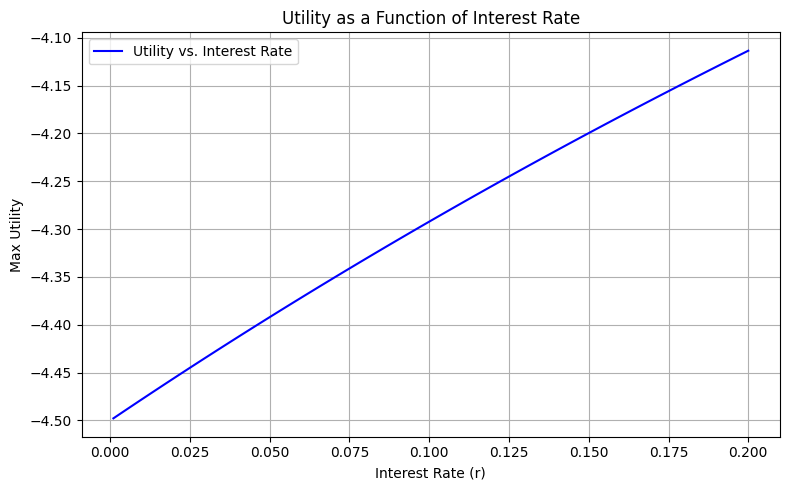

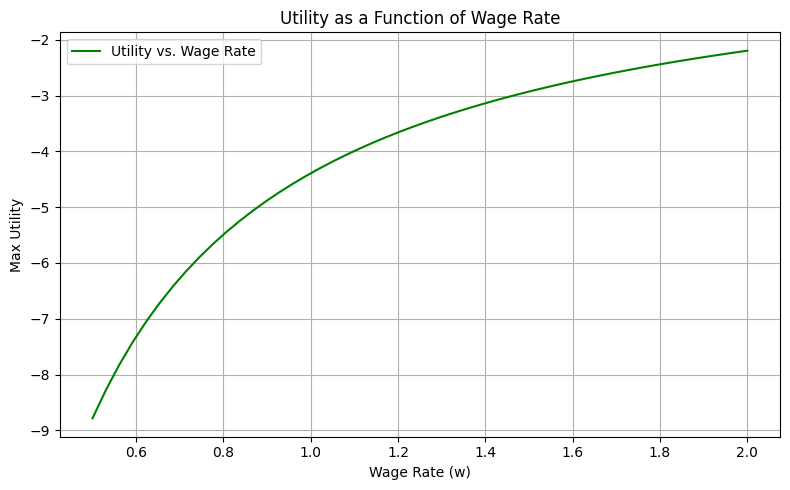

In [65]:
#2.4

# Parameters
gamma = 0.5
beta = 1

# Objective: Negative utility w.r.t c2, c3
def neg_utility_c2_c3(c, r, w):
    c2, c3 = c
    rhs = w + w / (1 + r)
    c1 = rhs - c2 / (1 + r) - c3 / ((1 + r)**2)
    if c1 <= 0 or c2 <= 0 or c3 <= 0:
        return np.inf  # handle invalid values
    u1 = c1**(1 - 1/gamma) / (1 - 1/gamma)
    u2 = beta * c2**(1 - 1/gamma) / (1 - 1/gamma)
    u3 = beta**2 * c3**(1 - 1/gamma) / (1 - 1/gamma)
    return -(u1 + u2 + u3)

def optimize_given_r_w(r, w):
    result = minimize(neg_utility_c2_c3, x0=[0.5, 0.5], args=(r, w), method='SLSQP')
    if result.success:
        c2_opt, c3_opt = result.x
        rhs = w + w / (1 + r)
        c1_opt = rhs - c2_opt / (1 + r) - c3_opt / ((1 + r)**2)
        utility = -neg_utility_c2_c3((c2_opt, c3_opt), r, w)  # flip sign
        return utility
    else:
        return np.nan

# --- Single optimization at baseline ---
r = 0
w = 1
rhs = w + w / (1 + r)

initial_guess = [0.3, 0.3]
result = minimize(neg_utility_c2_c3, initial_guess, args=(r, w), method='SLSQP')


# Extract results
optimal_c2, optimal_c3 = result.x
optimal_c1 = rhs - optimal_c2 / (1 + r) - optimal_c3 / ((1 + r)**2)
optimal_utility = neg_utility_c2_c3([optimal_c2, optimal_c3],r,w)

print(f"Optimal consumption:\noptimal c1 = {optimal_c1:.4f}, optimal c2 = {optimal_c2:.4f}, optimal c3 = {optimal_c3:.4f}\nMaximum utility = {-optimal_utility:.4f}")

# --- Plot 1: Utility vs. Interest Rate ---
r_vals = np.linspace(0.001, 0.2, 50)
utilities_r = [optimize_given_r_w(r, w=1.0) for r in r_vals]

plt.figure(figsize=(8, 5))
plt.plot(r_vals, utilities_r, label='Utility vs. Interest Rate', color='blue')
plt.xlabel('Interest Rate (r)')
plt.ylabel('Max Utility')
plt.title('Utility as a Function of Interest Rate')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# --- Plot 2: Utility vs. Wage Rate ---
w_vals = np.linspace(0.5, 2.0, 50)
utilities_w = [optimize_given_r_w(r=0.05, w=w) for w in w_vals]

plt.figure(figsize=(8, 5))
plt.plot(w_vals, utilities_w, label='Utility vs. Wage Rate', color='green')
plt.xlabel('Wage Rate (w)')
plt.ylabel('Max Utility')
plt.title('Utility as a Function of Wage Rate')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


polynomial:         2
-0.125 x + 10 x - 1.175e-11
Revenue-maximizing tax rate: τ* = 40.0000


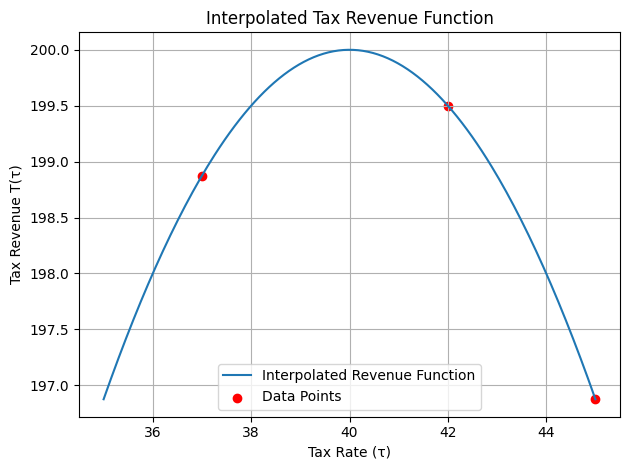

In [76]:
#2.7
#data decleration

tax_rates = np.array([37, 42, 45])
tax_revenue = np.array([198.875, 199.5, 196.875])

#polinomial interpolation
coefficients = np.polyfit(tax_rates,tax_revenue,deg=2)
polynomial = np.poly1d(coefficients) #returns a representation of the polynomial's coefficients, in decreasing powers.
                                     #For example, poly1d([1, 2, 3]) returns an object that represents x**2 + 2*x + 3

print(f'polynomial: {polynomial}')

#evaluatie the function at different values
tax_rate_range = np.linspace(35, 45, 200)
revenue_vals = polynomial(tax_rate_range)

# Maximizing revenue by minimizing the negative tax revenue function
result = minimize_scalar(lambda t: -polynomial(t), bounds=(35, 45), method='bounded')
optimal_tax_rate = result.x
revenue_max = polynomial(optimal_tax_rate)

print(f"Revenue-maximizing tax rate: τ* = {optimal_tax_rate:.4f}")

# Plot
plt.plot(tax_rate_range, revenue_vals, label="Interpolated Revenue Function")
plt.scatter(tax_rates, tax_revenue, color='red', label="Data Points")
plt.xlabel("Tax Rate (τ)")
plt.ylabel("Tax Revenue T(τ)")
plt.title("Interpolated Tax Revenue Function")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

#piecewise - linear is well fit for linear, our function is not linear
#Cubic spine - poorly describes global properties which are required here (concavity)


C:\Users\oluri\AppData\Local\Temp\ipykernel_8748\4245374394.py:16: RuntimeWarning: invalid value encountered in sqrt
  return alpha / np.sqrt(q) + q
C:\Users\oluri\AppData\Local\Temp\ipykernel_8748\4245374394.py:31: RuntimeWarning: The iteration is not making good progress, as measured by the 
 improvement from the last ten iterations.
  q_solution = fsolve(equation, 1.0)[0]
C:\Users\oluri\AppData\Local\Temp\ipykernel_8748\4245374394.py:31: RuntimeWarning: The iteration is not making good progress, as measured by the 
 improvement from the last five Jacobian evaluations.
  q_solution = fsolve(equation, 1.0)[0]
C:\Users\oluri\AppData\Local\Temp\ipykernel_8748\4245374394.py:75: RuntimeWarning: The iteration is not making good progress, as measured by the 
 improvement from the last ten iterations.
  eq_price = fsolve(market_equilibrium, 1.0)[0]
C:\Users\oluri\AppData\Local\Temp\ipykernel_8748\4245374394.py:112: RuntimeWarning: The iteration is not making good progress, as measured by the

Original parameters: m=5, eta=1.5, alpha=0.5
Equilibrium price: 0.9766
Equilibrium quantity per firm: 0.3650
Equilibrium total quantity: 1.8249

Results from parameter variations:
m=2, eta=1.5, alpha=0.5
  Equilibrium price: 1.4753
  Quantity per firm: 0.2790
  Total quantity: 0.5580

m=5, eta=1.5, alpha=0.5
  Equilibrium price: 0.9766
  Quantity per firm: 0.3650
  Total quantity: 1.8249

m=10, eta=1.5, alpha=0.5
  Equilibrium price: 1.0000
  Quantity per firm: 0.3771
  Total quantity: 3.7708

m=20, eta=1.5, alpha=0.5
  Equilibrium price: 1.0000
  Quantity per firm: 0.3864
  Total quantity: 7.7283

m=5, eta=1.0, alpha=0.5
  Equilibrium price: 0.9910
  Quantity per firm: 0.3476
  Total quantity: 1.7382

m=5, eta=1.5, alpha=0.5
  Equilibrium price: 0.9766
  Quantity per firm: 0.3650
  Total quantity: 1.8249

m=5, eta=2.0, alpha=0.5
  Equilibrium price: 0.8047
  Quantity per firm: 0.3203
  Total quantity: 1.6017

m=5, eta=2.5, alpha=0.5
  Equilibrium price: 0.5285
  Quantity per firm: 0.9

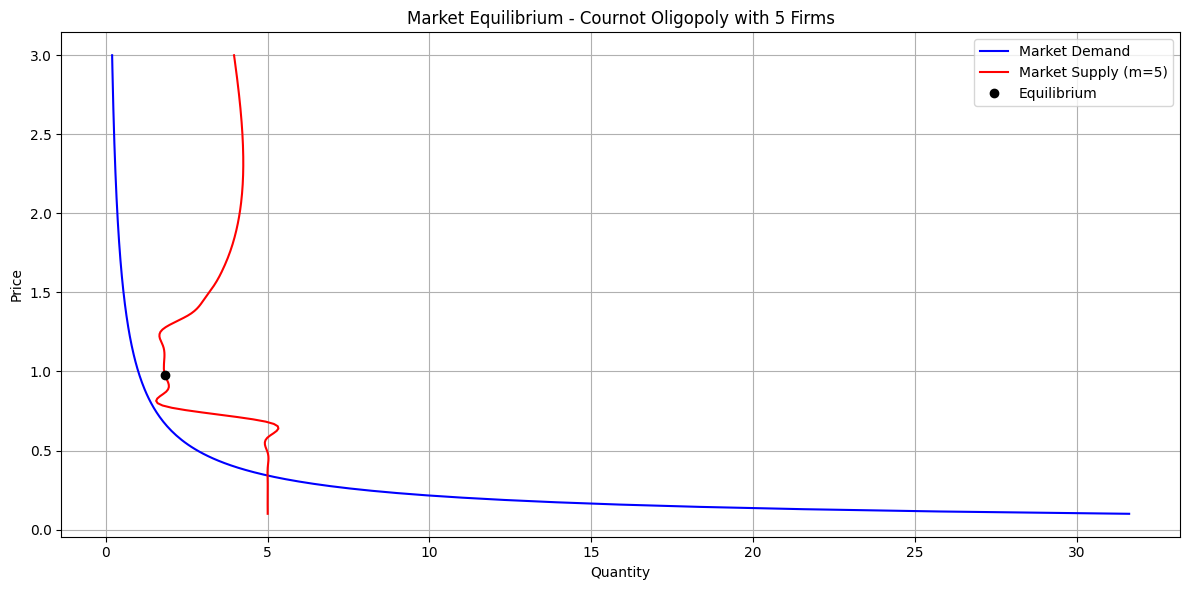

"\nEconomic Analysis of Cournot Oligopoly Results:\n\n1. Effect of changing the number of firms (m):\n   As m increases (more firms enter the market), the equilibrium price decreases \n   and total market quantity increases. This is the classic Cournot result where \n   more competition drives prices toward marginal cost (approaching perfect competition).\n   Individual firm quantity decreases with more firms as the market is shared among more competitors.\n\n2. Effect of changing price elasticity (η):\n   Higher elasticity (more sensitive demand) leads to lower equilibrium prices and higher quantities.\n   When demand is more elastic, firms have less market power and must set lower prices.\n   \n3. Effect of changing cost parameter (α):\n   Higher α means higher marginal costs, which leads to higher equilibrium prices and lower quantities.\n   This reduces consumer surplus and total market efficiency.\n\nThe Cournot model illustrates how oligopolistic competition leads to an equilibri

In [79]:
#2.9

# Parameters
m = 5  # Number of identical companies
eta = 1.5  # Price elasticity
alpha = 0.5  # Cost parameter

# (a) Set up equidistant price grid and derive quantities

def grid_cons_equi(p_min, p_max, N):
    """Creates an equidistant price grid"""
    return np.linspace(p_min, p_max, N)

def marginal_cost(q):
    """Marginal cost function"""
    return alpha / np.sqrt(q) + q

def compute_quantity(p):
    """
    Computes quantity q for a given price p by equating marginal benefits and costs
    Marginal benefit: p + q * dp/dq where dp/dq = 1/(m*D'(p))
    For D(p) = p^(-eta), D'(p) = -eta * p^(-eta-1)
    So dp/dq = 1/(m*(-eta*p^(-eta-1))) = -p^(eta+1)/(m*eta)
    """
    def equation(q):
        dp_dq = -p**(eta+1)/(m*eta)
        marginal_benefit = p + q * dp_dq
        return marginal_benefit - marginal_cost(q)
    
    # Solve for q, using initial guess of 1
    q_solution = fsolve(equation, 1.0)[0]
    
    # Return 0 if negative or solution resulted in a very small number
    return max(0, q_solution) if q_solution > 1e-6 else 0

# Set up the grid
N = 31  # Number of grid points
p_grid = grid_cons_equi(0.1, 3.0, N)  # Avoid p=0 as it causes numerical issues
coeff_q = 0  # Initialize spline coefficients

# Compute quantities at each price point
q_values = np.zeros(N)
for i in range(N):
    q_values[i] = compute_quantity(p_grid[i])

# (b) Interpolate individual supply function
tck_q = interpolate.splrep(p_grid, q_values, s=0)  # s=0 for exact interpolation

def spline_interp(x, y):
    """Create a spline interpolation"""
    return interpolate.splrep(x, y, s=0)

def spline_eval(tck, x_new):
    """Evaluate a spline at new points"""
    return interpolate.splev(x_new, tck, der=0)

# Create a finer grid for smoother plotting
p_fine = np.linspace(0.1, 3.0, 200)
q_fine = spline_eval(tck_q, p_fine)

# Calculate market demand at each price
demand = p_fine**(-eta)

# Calculate total supply (m times individual supply)
total_supply = m * q_fine

# (c) Compute equilibrium
def market_equilibrium(p):
    """Function to find where demand equals supply"""
    q_supply = m * spline_eval(tck_q, p)
    q_demand = p**(-eta)
    return q_supply - q_demand

# Find equilibrium price
eq_price = fsolve(market_equilibrium, 1.0)[0]
eq_quantity_per_firm = spline_eval(tck_q, eq_price)
eq_total_quantity = m * eq_quantity_per_firm

# (d) Analyze effect of changing parameters
results = []

# Test different numbers of firms
m_values = [2, 5, 10, 20]
# Test different price elasticities
eta_values = [1.0, 1.5, 2.0, 2.5]
# Test different cost parameters
alpha_values = [0.2, 0.5, 0.8, 1.0]

# Function to calculate equilibrium for given parameters
def calculate_equilibrium(m_val, eta_val, alpha_val):
    global m, eta, alpha
    
    # Update parameters
    m = m_val
    eta = eta_val
    alpha = alpha_val
    
    # Recalculate quantities
    q_values = np.zeros(N)
    for i in range(N):
        q_values[i] = compute_quantity(p_grid[i])
    
    # Update spline
    tck_q = interpolate.splrep(p_grid, q_values, s=0)
    
    # Find new equilibrium
    def market_equilibrium(p):
        q_supply = m * spline_eval(tck_q, p)
        q_demand = p**(-eta)
        return q_supply - q_demand
    
    eq_price = fsolve(market_equilibrium, 1.0)[0]
    eq_quantity_per_firm = spline_eval(tck_q, eq_price)
    eq_total_quantity = m * eq_quantity_per_firm
    
    return {
        'm': m_val,
        'eta': eta_val,
        'alpha': alpha_val,
        'eq_price': eq_price,
        'eq_quantity_per_firm': eq_quantity_per_firm,
        'eq_total_quantity': eq_total_quantity
    }

# Reset to original parameters for plotting
m = 5
eta = 1.5
alpha = 0.5

# Plot the results
plt.figure(figsize=(12, 6))

# Plot demand curve
plt.plot(demand, p_fine, 'b-', label='Market Demand')

# Plot supply curve
plt.plot(total_supply, p_fine, 'r-', label='Market Supply (m={})'.format(m))

# Mark equilibrium point
plt.plot(eq_total_quantity, eq_price, 'ko', label='Equilibrium')

plt.xlabel('Quantity')
plt.ylabel('Price')
plt.title('Market Equilibrium - Cournot Oligopoly with {} Firms'.format(m))
plt.grid(True)
plt.legend()

# Compute results for parameter variations
for m_val in m_values:
    results.append(calculate_equilibrium(m_val, 1.5, 0.5))

for eta_val in eta_values:
    results.append(calculate_equilibrium(5, eta_val, 0.5))

for alpha_val in alpha_values:
    results.append(calculate_equilibrium(5, 1.5, alpha_val))

# Print results
print(f"Original parameters: m={5}, eta={1.5}, alpha={0.5}")
print(f"Equilibrium price: {eq_price:.4f}")
print(f"Equilibrium quantity per firm: {eq_quantity_per_firm:.4f}")
print(f"Equilibrium total quantity: {eq_total_quantity:.4f}")

print("\nResults from parameter variations:")
for result in results:
    print(f"m={result['m']}, eta={result['eta']}, alpha={result['alpha']}")
    print(f"  Equilibrium price: {result['eq_price']:.4f}")
    print(f"  Quantity per firm: {result['eq_quantity_per_firm']:.4f}")
    print(f"  Total quantity: {result['eq_total_quantity']:.4f}")
    print()

plt.tight_layout()
plt.show()

# Economic interpretation of results
"""
Economic Analysis of Cournot Oligopoly Results:

1. Effect of changing the number of firms (m):
   As m increases (more firms enter the market), the equilibrium price decreases 
   and total market quantity increases. This is the classic Cournot result where 
   more competition drives prices toward marginal cost (approaching perfect competition).
   Individual firm quantity decreases with more firms as the market is shared among more competitors.

2. Effect of changing price elasticity (η):
   Higher elasticity (more sensitive demand) leads to lower equilibrium prices and higher quantities.
   When demand is more elastic, firms have less market power and must set lower prices.
   
3. Effect of changing cost parameter (α):
   Higher α means higher marginal costs, which leads to higher equilibrium prices and lower quantities.
   This reduces consumer surplus and total market efficiency.

The Cournot model illustrates how oligopolistic competition leads to an equilibrium between 
perfect competition and monopoly. As the number of firms increases, the market approaches 
perfect competition with price equal to marginal cost. Conversely, when m=1 (monopoly),
the firm can set higher prices and restrict output to maximize profit.

The market power of each firm is inversely related to both the number of competitors and
the elasticity of demand. With more elastic demand, consumers are more responsive to price 
changes, which limits firms' ability to raise prices above competitive levels.
"""